<a href="https://colab.research.google.com/github/OmarGhoz/FreeCodeCamb-Machine-Learning-Projects/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import os
import zipfile

# Downloading and extracting dataset (link assumed to be provided)
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    fname='cats_and_dogs_filtered.zip',
    extract=True)

# Defining paths
base_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Defining global variables
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Correcting paths for training and validation directories only
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [9]:
# Create ImageDataGenerators for train, validation, and test datasets
train_image_generator = ImageDataGenerator(rescale=1./255)  # Rescaling pixel values
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Generate batches of image data
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')  # Binary classification: Cats and Dogs

validation_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

test_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode=None,  # No labels needed for testing
    shuffle=False  # Ensure consistent order for predictions
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


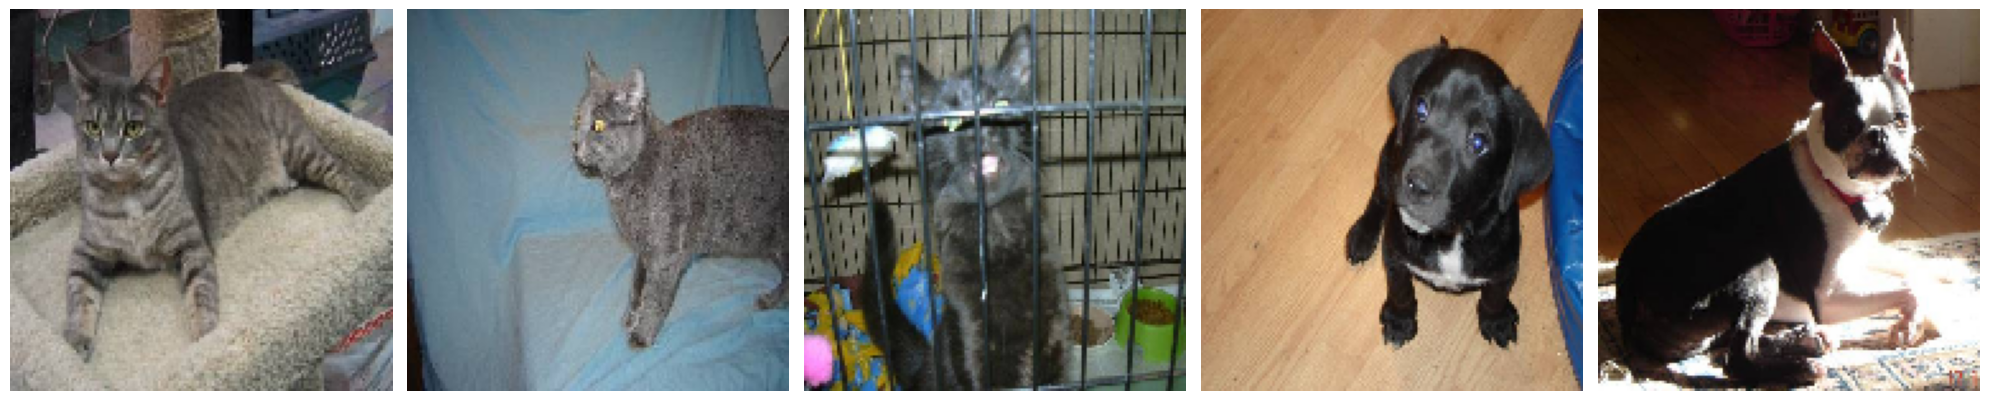

In [10]:
# Function to plot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Test the function by plotting training images
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [11]:
# Data Augmentation for Training Data
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')


Found 2000 images belonging to 2 classes.


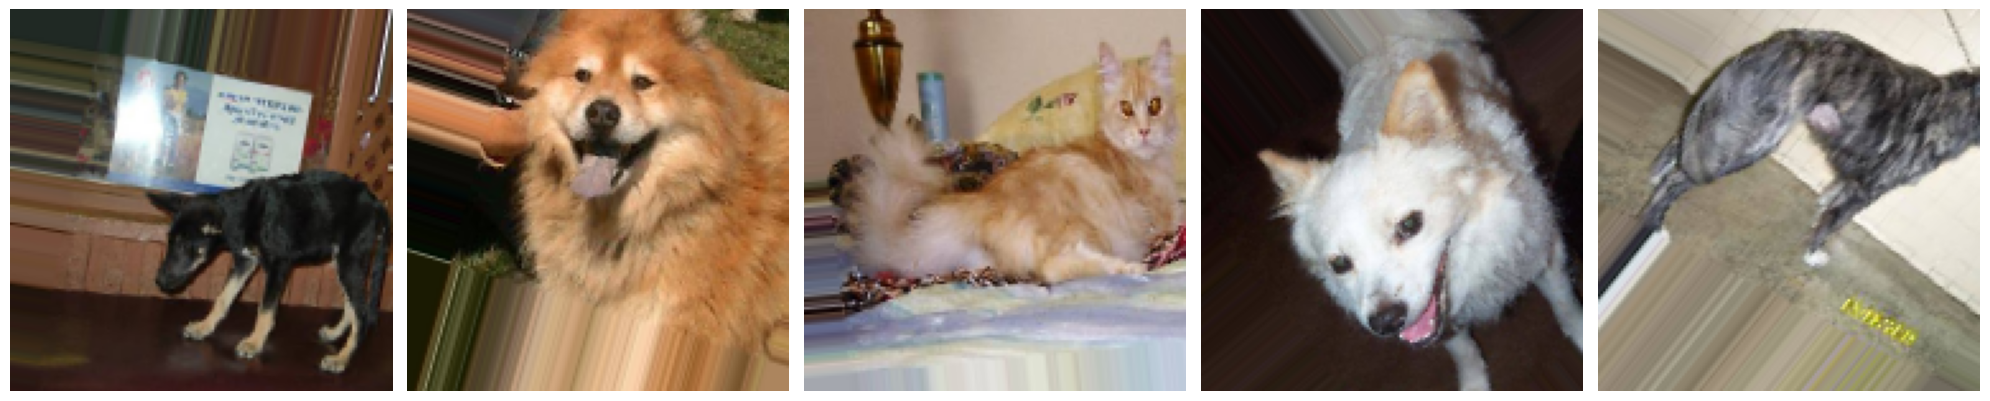

In [12]:
# Display augmented images
augmented_images, _ = next(train_data_gen)
plotImages(augmented_images[:5])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the Sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
EPOCHS = 20

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples // BATCH_SIZE
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.4949 - loss: 0.9109 - val_accuracy: 0.5192 - val_loss: 0.6845
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5000 - loss: 0.6924 - val_accuracy: 0.8750 - val_loss: 0.6735
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5505 - loss: 0.6883 - val_accuracy: 0.5736 - val_loss: 0.6775
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4062 - loss: 0.7045 - val_accuracy: 0.7500 - val_loss: 0.6274
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.5348 - loss: 0.6739 - val_accuracy: 0.5917 - val_loss: 0.6626
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5312 - loss: 0.6733 - val_accuracy: 0.2500 - val_loss: 0.7065
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.5839 - loss: 0.6696 - val_accuracy: 0.6270 - val_loss: 0.6325
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6875 - loss: 0.6235 - val_accuracy: 0.5000 - val_loss: 0.7022
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5918 - loss: 0.6504 - val_accuracy: 0.6593 - val_loss: 0.6199
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7188 - loss: 0.6093 - val_accuracy: 0.7500 - val_loss: 0.604

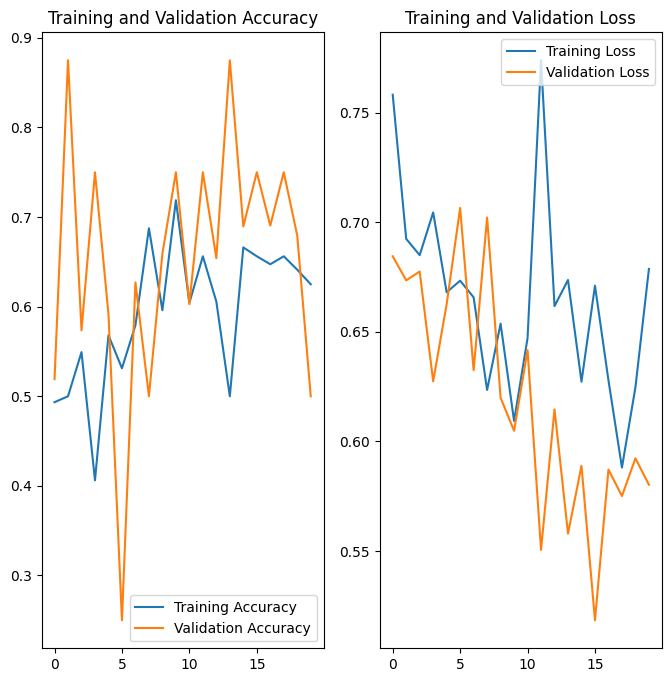

In [15]:
# Extract accuracy and loss from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

# Plot training and validation accuracy and loss
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


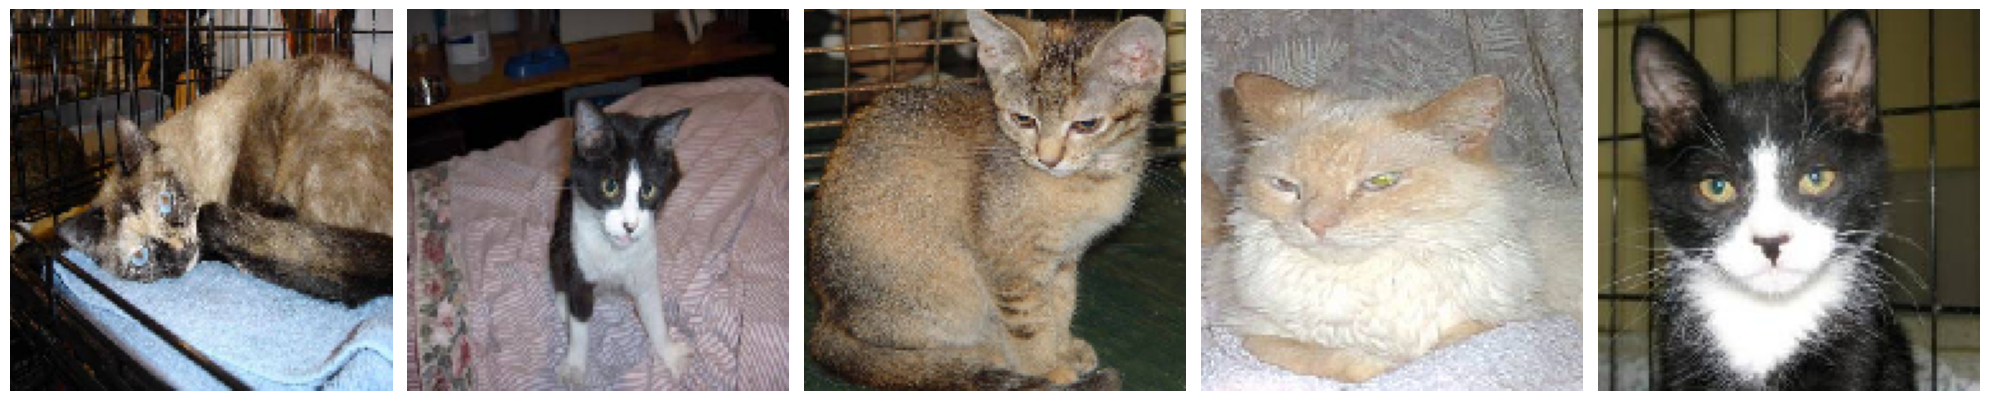

In [18]:
# Predict on test data
probabilities = model.predict(test_data_gen)

# Function to display test images with predictions
def plotImagesWithProbabilities(images_arr, probabilities):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, ax, prob in zip(images_arr, axes, probabilities):
        ax.imshow(img)
        ax.set_title(f"{prob[0]*100:.2f}% Dog")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get test images from the generator
test_images = next(test_data_gen)

# Make predictions
probabilities = model.predict(test_images)

# Plot test images without probabilities
plotImages(test_images)


In [19]:
# Evaluate final accuracy
final_accuracy = history.history['val_accuracy'][-1]
print(f"Validation Accuracy: {final_accuracy * 100:.2f}%")

if final_accuracy >= 0.63:
    print("Congratulations! You passed the challenge!")
else:
    print("Keep training to improve accuracy.")


Validation Accuracy: 50.00%
Keep training to improve accuracy.
